In [20]:
from PIL import Image
image_path = "../data/local/mid_petri_1.png"
Image.open(image_path).show()

In [18]:
from groq import Groq
import os
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "../data/local/mid_petri_1.png"
base64_image = encode_image(image_path)

client = Groq(api_key="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")
completion = client.chat.completions.create(
    model="meta-llama/llama-4-scout-17b-16e-instruct",
    messages=[
        {
            "role": "system",
            "content": "{\n  \"places\": [\n    {\"id\": \"string\", \"tokens\": \"integer\"}\n  ],\n  \"transitions\": [\n    {\"id\": \"string\", \"delay\": \"number_or_string\"}\n  ],\n  \"arcs\": [\n    {\"source\": \"string\", \"target\": \"string\", \"weight\": \"integer\"}\n  ]\n}"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Take image of a Petri net as input and provide the textual representation of the graph in json format, according to this json template."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                }
            ]
        }
    ],
    temperature=1,
    max_completion_tokens=2048,
    top_p=1,
    stream=False,
    response_format={"type": "json_object"},
    stop=None,
)


In [19]:
output_file_path = f"../data/output/output.json"
with open(output_file_path, "w", encoding="utf-8") as f:
    f.write(completion.choices[0].message.content)

In [10]:
import pm4py
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Assuming 'net', 'initial_marking', and 'final_marking' are your Petri net components
net, im, fm = pm4py.read.read_pnml("../data/output/output.pnml")
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.save(gviz, 'output_petri_net.gv')

''

In [ ]:
                    # "image_url": {
                    #     "url": "https://upload.wikimedia.org/wikipedia/commons/d/da/SF_From_Marin_Highlands3.jpg"
                    # }

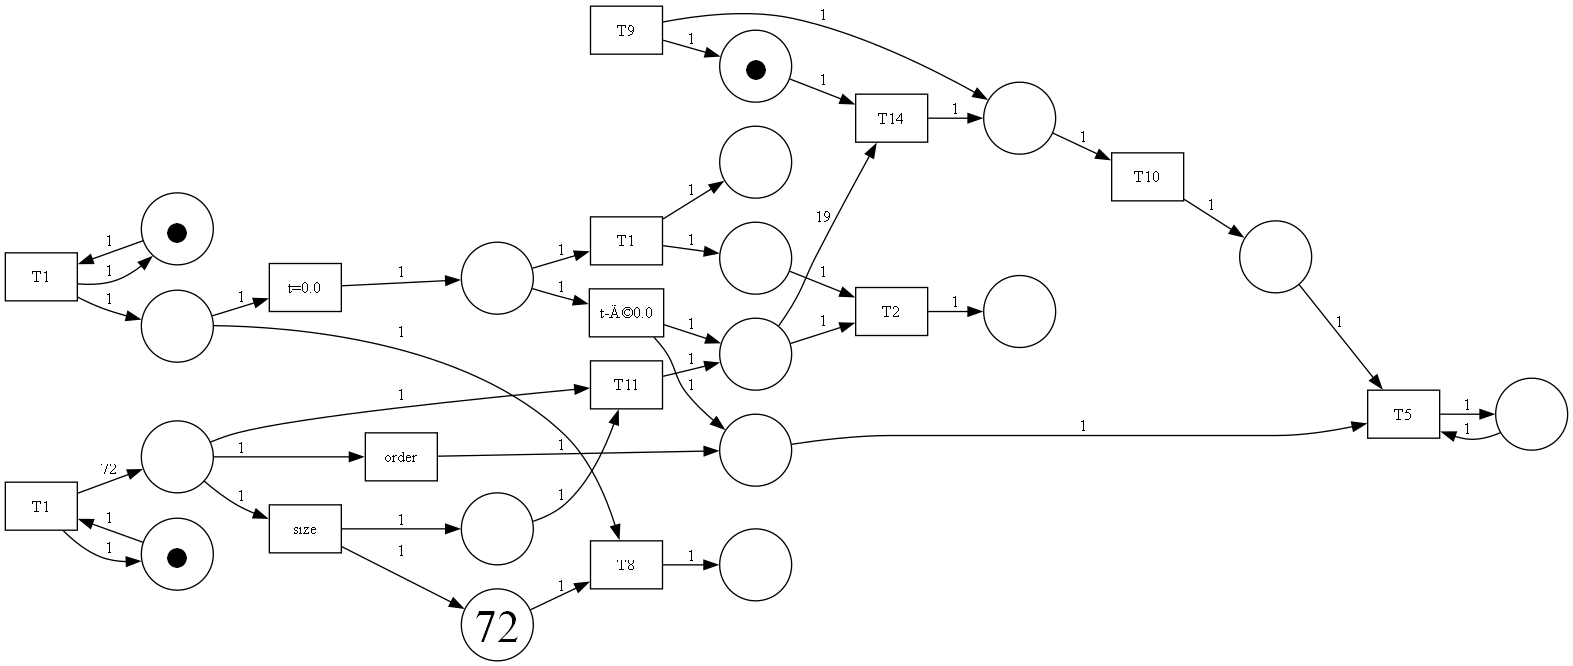

''

In [5]:
import pm4py
net, im, fm = pm4py.read.read_pnml("../data/output/output.pnml")
pm4py.view_petri_net(net, im, fm)
pm4py.save_vis_petri_net(net, im, fm, '../data/output/converted_petri_net.png')
pm4py.view_petri_net(net, im, fm, format='gv')

In [ ]:
# def filter_petri_net_elements(
#     initial_places: list[Place], 
#     initial_transitions: list[Transition], 
#     initial_arcs: list[Arc]
# ) -> tuple[list[Place], list[Transition], list[Arc]]:
#     """
#     Filters lists of Place, Transition, and Arc objects based on connectivity rules.

#     Rules:
#     - Places must have at least one arc; otherwise, they are removed.
#     - Transitions must have at least two connections.
#         - If 0 or 1 connection, transition and its arcs are removed.
#         - If >= 2 connections, must have >=1 incoming and >=1 outgoing arc.
#         - If not, one arc is flipped to satisfy this. If still not satisfied, transition is removed.
#     - Arcs are removed if their source or target is removed.
#     """
#     current_places = list(initial_places)
#     current_transitions = list(initial_transitions)
#     current_arcs = list(initial_arcs) # This list contains arc objects that can be modified (flipped)

#     while True:
#         prev_places_len = len(current_places)
#         prev_transitions_len = len(current_transitions)
#         prev_arcs_len = len(current_arcs)
#         any_arc_flipped_this_iteration = False

#         # --- Step 1: Filter Places ---
#         # A place is kept if it's connected to at least one arc in current_arcs.
#         if not current_arcs: # Optimization: if no arcs, all places are removed
#             current_places = []
#         else:
#             place_ids_to_keep = set()
#             for p in current_places:
#                 # Object identity is used for p, arc.source, arc.target if Place has no __eq__
#                 if any(arc.source == p or arc.target == p for arc in current_arcs):
#                     place_ids_to_keep.add(p.id)
#             current_places = [p for p in current_places if p.id in place_ids_to_keep]

#         # --- Step 2: Filter Transitions ---
#         next_transitions = []
#         arc_ids_to_remove_due_to_transitions = set() # Store arc.id for removal

#         for t in current_transitions:
#             # Get all arcs connected to this transition from the current state of 'current_arcs'
#             # These are direct object references from current_arcs
#             connected_arcs_to_t = [arc for arc in current_arcs if arc.source == t or arc.target == t]

#             if len(connected_arcs_to_t) < 2:
#                 for arc_obj in connected_arcs_to_t:
#                     arc_ids_to_remove_due_to_transitions.add(arc_obj.id)
#                 continue # Transition removed, its arcs marked

#             # Has >= 2 connections. Check for incoming and outgoing.
#             incoming_for_t = [arc for arc in connected_arcs_to_t if arc.target == t]
#             outgoing_for_t = [arc for arc in connected_arcs_to_t if arc.source == t]
            
#             # Perform flip if necessary. This modifies an arc object within 'current_arcs'.
#             if not outgoing_for_t and incoming_for_t: # All incoming, need one outgoing
#                 arc_to_flip = incoming_for_t[0] 
#                 arc_to_flip.source, arc_to_flip.target = arc_to_flip.target, arc_to_flip.source
#                 any_arc_flipped_this_iteration = True
#                 # Re-evaluate for this transition after flip (arc_to_flip object is modified)
#                 incoming_for_t = [arc for arc in connected_arcs_to_t if arc.target == t]
#                 outgoing_for_t = [arc for arc in connected_arcs_to_t if arc.source == t]
            
#             elif not incoming_for_t and outgoing_for_t: # All outgoing, need one incoming
#                 arc_to_flip = outgoing_for_t[0]
#                 arc_to_flip.source, arc_to_flip.target = arc_to_flip.target, arc_to_flip.source
#                 any_arc_flipped_this_iteration = True
#                 # Re-evaluate
#                 incoming_for_t = [arc for arc in connected_arcs_to_t if arc.target == t]
#                 outgoing_for_t = [arc for arc in connected_arcs_to_t if arc.source == t]

#             # Final check for the transition's validity
#             if incoming_for_t and outgoing_for_t and len(connected_arcs_to_t) >= 2:
#                 next_transitions.append(t)
#             else:
#                 # Transition removed (flip didn't help or other conditions not met)
#                 for arc_obj in connected_arcs_to_t:
#                     arc_ids_to_remove_due_to_transitions.add(arc_obj.id)
        
#         current_transitions = next_transitions
        
#         if arc_ids_to_remove_due_to_transitions:
#             current_arcs = [arc for arc in current_arcs if arc.id not in arc_ids_to_remove_due_to_transitions]

#         # --- Step 3: General Arc Cleanup (remove arcs with missing source/target) ---
#         active_place_ids = {p.id for p in current_places}
#         active_transition_ids = {t.id for t in current_transitions}
        
#         final_arcs_this_pass = []
#         for arc in current_arcs:
#             source_is_valid = False
#             # isinstance checks are important as source/target can be Place or Transition
#             if isinstance(arc.source, Place):
#                 source_is_valid = arc.source.id in active_place_ids
#             elif isinstance(arc.source, Transition):
#                 source_is_valid = arc.source.id in active_transition_ids
            
#             target_is_valid = False
#             if isinstance(arc.target, Place):
#                 target_is_valid = arc.target.id in active_place_ids
#             elif isinstance(arc.target, Transition):
#                 target_is_valid = arc.target.id in active_transition_ids
            
#             if source_is_valid and target_is_valid:
#                 final_arcs_this_pass.append(arc)
#         current_arcs = final_arcs_this_pass

#         # --- Check for stability ---
#         if (len(current_places) == prev_places_len and
#             len(current_transitions) == prev_transitions_len and
#             len(current_arcs) == prev_arcs_len and
#             not any_arc_flipped_this_iteration):
#             break # Stable state reached
            
#     return current_places, current_transitions, current_arcs


# def sanitize_petri_net(
#     places: List[Place],
#     transitions: List[Transition],
#     arcs: List[Arc],
# ) -> Tuple[List[Place], List[Transition], List[Arc]]:
#     """
#     • Removes isolated places (0 incident arcs).  
#     • Removes transitions with < 2 incident arcs.  
#     • For every remaining transition ensures it has ≥ 1 incoming **and** ≥ 1 outgoing
#       arc; if not, one incident arc is flipped in-place.  

#     Returns
#     -------
#     (places_ok, transitions_ok, arcs_ok) – three **new** lists that fulfil the
#     constraints:
#         • all places have ≥ 1 incident arc
#         • all transitions have ≥ 2 incident arcs and both directions represented
#         • no duplicate ids are introduced, no parallel (src, tgt) duplicates
#     """
#     # ------------------------------------------------------------------
#     # 1. Collect incident-arc information
#     # ------------------------------------------------------------------
#     incoming = defaultdict(list)   # transition ➜ [arc, …] where arc.target is the transition
#     outgoing = defaultdict(list)   # transition ➜ [arc, …] where arc.source is the transition
#     touched_places = set()         # every place that appears in ≥1 arc

#     for arc in arcs:
#         if isinstance(arc.source, Place):
#             touched_places.add(arc.source)
#         if isinstance(arc.target, Place):
#             touched_places.add(arc.target)
#         if isinstance(arc.source, Transition):
#             outgoing[arc.source].append(arc)
#         if isinstance(arc.target, Transition):
#             incoming[arc.target].append(arc)

#     print(f"len(touched_places): {len(touched_places)}")
#     print(f"len(places): {len(places)}")

#     print( "len(incoming): ", len(incoming))
#     print( "len(outgoing): ", len(outgoing))
#     # ------------------------------------------------------------------
#     # 2. Prune places with 0 arcs
#     # ------------------------------------------------------------------
#     places_ok = [p for p in places if p in touched_places]
#     valid_place_ids = {p.id for p in places_ok}

#     # ------------------------------------------------------------------
#     # 3. Prune transitions with < 2 incident arcs
#     # ------------------------------------------------------------------
#     transitions_ok: list[Transition] = []
#     removed_transition_ids: set[str] = set()

#     for t in transitions:
#         deg = len(incoming[t]) + len(outgoing[t])
#         if deg >= 2:
#             transitions_ok.append(t)
#         else:
#             removed_transition_ids.add(t.id)

#     print(f"len(transitions_ok): {len(transitions_ok)}")
#     print(f"len(removed_transition_ids): {len(removed_transition_ids)}")
#     print(f"removed_transition_ids: {removed_transition_ids}")
#     # ------------------------------------------------------------------
#     # 4. Filter arcs referring to anything we just removed
#     # ------------------------------------------------------------------
#     arcs_ok: list[Arc] = []
#     for arc in arcs:
#         if isinstance(arc.source, Place) and arc.source.id not in valid_place_ids:
#             continue
#         if isinstance(arc.target, Place) and arc.target.id not in valid_place_ids:
#             continue
#         if isinstance(arc.source, Transition) and arc.source.id in removed_transition_ids:
#             continue
#         if isinstance(arc.target, Transition) and arc.target.id in removed_transition_ids:
#             continue
#         arcs_ok.append(arc)

#     # refresh incident tables after pruning
#     incoming.clear()
#     outgoing.clear()
#     for arc in arcs_ok:
#         if isinstance(arc.source, Transition):
#             outgoing[arc.source].append(arc)
#         if isinstance(arc.target, Transition):
#             incoming[arc.target].append(arc)

#     # ------------------------------------------------------------------
#     # 5. Make sure every kept transition has both directions.
#     #    Flip one arc in-place when a direction is missing.
#     # ------------------------------------------------------------------
#     for t in transitions_ok:
#         in_arcs  = incoming[t]
#         out_arcs = outgoing[t]

#         need_in  = len(in_arcs)  == 0
#         need_out = len(out_arcs) == 0

#         # flip at most one arc for each missing side
#         if need_in and out_arcs:
#             arc = out_arcs[0]
#             # swap ends
#             arc.source, arc.target = arc.target, arc.source
#             arc.start_point, arc.end_point = arc.end_point, arc.start_point
#             incoming[t].append(arc)
#             outgoing[t].remove(arc)

#         if need_out and incoming[t]:
#             arc = incoming[t][0]
#             arc.source, arc.target = arc.target, arc.source
#             arc.start_point, arc.end_point = arc.end_point, arc.start_point
#             outgoing[t].append(arc)
#             incoming[t].remove(arc)

#     return places_ok, transitions_ok, arcs_ok
